## WEB Scraping into Visualization

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import urllib.request
# Library for opening url and creating
# requests
import urllib.request
 
# pretty-print python data structures
from pprint import pprint
 
# for parsing all the tables present
# on the website
from html_table_parser.parser import HTMLTableParser
 
# for converting the parsed data in a
# pandas dataframe
import pandas as pd

In [35]:
url = "https://en.wikipedia.org/wiki/UEFA_Euro_2020_squads"
data  = requests.get(url).text

In [36]:
data

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>UEFA Euro 2020 squads - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"f8d75b0e-bf3e-43d6-a340-f9c372942739","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"UEFA_Euro_2020_squads","wgTitle":"UEFA Euro 2020 squads","wgCurRevisionId":1038840917,"wgRevisionId":1038840917,"wgArticleId":67482519,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 German-language sources (de)","CS1 Italian-language sources (it)","CS1 French-language sources (fr)","CS1 Turkish-language sources (

In [37]:
soup = BeautifulSoup(data, 'html5lib')

In [38]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   UEFA Euro 2020 squads - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"f8d75b0e-bf3e-43d6-a340-f9c372942739","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"UEFA_Euro_2020_squads","wgTitle":"UEFA Euro 2020 squads","wgCurRevisionId":1038840917,"wgRevisionId":1038840917,"wgArticleId":67482519,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 German-language sources (de)","CS1 Italian-language sources (it)","CS1 French-language sources (fr)","CS1 Turkish-langua

In [39]:
soup.title.text

'UEFA Euro 2020 squads - Wikipedia'

In [63]:
# Opens a website and read its
# binary contents (HTTP Response Body)
def url_get_contents(url):
 
    # Opens a website and read its
    # binary contents (HTTP Response Body)
 
    #making request to the website
    req = urllib.request.Request(url=url)
    f = urllib.request.urlopen(req)
 
    #reading contents of the website
    return f.read()
 
# defining the html contents of a URL.
xhtml = url_get_contents('https://en.wikipedia.org/wiki/UEFA_Euro_2020_squads').decode('utf-8')
 
# Defining the HTMLTableParser object
p = HTMLTableParser()
 
# feeding the html contents in the
# HTMLTableParser object
p.feed(xhtml)
 
# Now finally obtaining the data of
# the table required
pprint(p.tables[0])
 
# converting the parsed data to
# dataframe
print("\n\nPANDAS DATAFRAME\n")
print(pd.DataFrame(p.tables[0]))

[['No.', 'Pos.', 'Player', 'Date of birth (age)', 'Caps', 'Goals', 'Club'],
 ['1',
  '1 GK',
  'Salvatore Sirigu',
  '( 1987-01-12 ) 12 January 1987 (aged 34)',
  '26',
  '0',
  'Torino'],
 ['2',
  '2 DF',
  'Giovanni Di Lorenzo',
  '( 1993-08-04 ) 4 August 1993 (aged 27)',
  '7',
  '0',
  'Napoli'],
 ['3',
  '2 DF',
  'Giorgio Chiellini  ( captain )',
  '( 1984-08-14 ) 14 August 1984 (aged 36)',
  '107',
  '8',
  'Juventus'],
 ['4',
  '2 DF',
  'Leonardo Spinazzola',
  '( 1993-03-25 ) 25 March 1993 (aged 28)',
  '14',
  '0',
  'Roma'],
 ['5',
  '3 MF',
  'Manuel Locatelli',
  '( 1998-01-08 ) 8 January 1998 (aged 23)',
  '10',
  '1',
  'Sassuolo'],
 ['6',
  '3 MF',
  'Marco Verratti',
  '( 1992-11-05 ) 5 November 1992 (aged 28)',
  '40',
  '3',
  'Paris Saint-Germain'],
 ['7',
  '3 MF',
  'Gaetano Castrovilli',
  '( 1997-02-17 ) 17 February 1997 (aged 24)',
  '2',
  '0',
  'Fiorentina'],
 ['8',
  '3 MF',
  'Jorginho',
  '( 1991-12-20 ) 20 December 1991 (aged 29)',
  '28',
  '5',
  'Che

In [85]:
italy=pd.DataFrame(p.tables[0])
italy.head()

,0,1,2,3,4,5,6
0,No.,Pos.,Player,Date of birth (age),Caps,Goals,Club
1,1,1 GK,Salvatore Sirigu,( 1987-01-12 ) 12 January 1987 (aged 34),26,0,Torino
2,2,2 DF,Giovanni Di Lorenzo,( 1993-08-04 ) 4 August 1993 (aged 27),7,0,Napoli
3,3,2 DF,Giorgio Chiellini ( captain ),( 1984-08-14 ) 14 August 1984 (aged 36),107,8,Juventus
4,4,2 DF,Leonardo Spinazzola,( 1993-03-25 ) 25 March 1993 (aged 28),14,0,Roma


In [86]:
new_header = italy.iloc[0] #grab the first row for the header
italy = italy[1:] #take the data less the header row
italy.columns = new_header #set the header row as the df header
italy

,No.,Pos.,Player,Date of birth (age),Caps,Goals,Club
1,1,1 GK,Salvatore Sirigu,( 1987-01-12 ) 12 January 1987 (aged 34),26,0,Torino
2,2,2 DF,Giovanni Di Lorenzo,( 1993-08-04 ) 4 August 1993 (aged 27),7,0,Napoli
3,3,2 DF,Giorgio Chiellini ( captain ),( 1984-08-14 ) 14 August 1984 (aged 36),107,8,Juventus
4,4,2 DF,Leonardo Spinazzola,( 1993-03-25 ) 25 March 1993 (aged 28),14,0,Roma
5,5,3 MF,Manuel Locatelli,( 1998-01-08 ) 8 January 1998 (aged 23),10,1,Sassuolo
6,6,3 MF,Marco Verratti,( 1992-11-05 ) 5 November 1992 (aged 28),40,3,Paris Saint-Germain
7,7,3 MF,Gaetano Castrovilli,( 1997-02-17 ) 17 February 1997 (aged 24),2,0,Fiorentina
8,8,3 MF,Jorginho,( 1991-12-20 ) 20 December 1991 (aged 29),28,5,Chelsea
9,9,4 FW,Andrea Belotti,( 1993-12-20 ) 20 December 1993 (aged 27),33,12,Torino
10,10,4 FW,Lorenzo Insigne,( 1991-06-04 ) 4 June 1991 (aged 30),41,8,Napoli


In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
italy.dtypes

0
No.                    object
Pos.                   object
Player                 object
Date of birth (age)    object
Caps                   object
Goals                  object
Club                   object
dtype: object

In [144]:
italy_caps = italy[["Player", "Caps"]]
italy_caps["Caps"] = italy_caps.Caps.astype(float)
italy_caps = italy_caps.sort_values(['Caps']).reset_index(drop=True)
italy_caps

<ipython-input-144-0fd6de345d94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_caps["Caps"] = italy_caps.Caps.astype(float)


,Player,Caps
0,Giacomo Raspadori,1.0
1,Alex Meret,2.0
2,Gaetano Castrovilli,2.0
3,Rafael Tolói,3.0
4,Alessandro Bastoni,5.0
5,Matteo Pessina,5.0
6,Giovanni Di Lorenzo,7.0
7,Manuel Locatelli,10.0
8,Bryan Cristante,11.0
9,Domenico Berardi,11.0


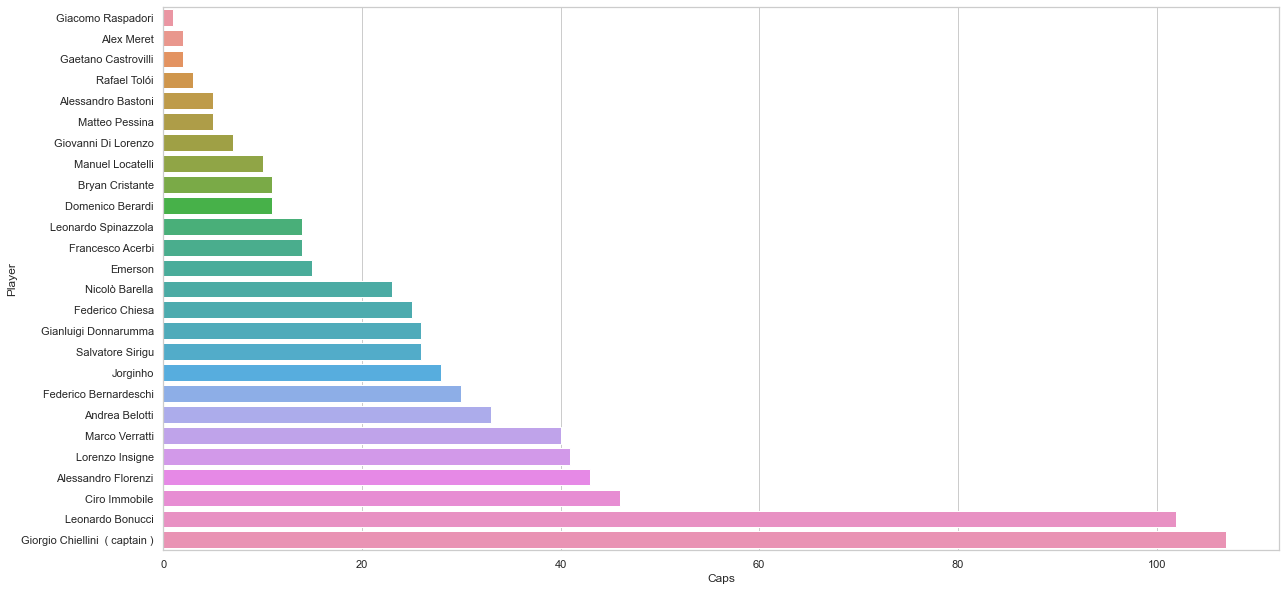

In [145]:
plt.figure(figsize=(20, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Caps", y="Player", data=italy_caps)

In [148]:
italy_goals = italy[["Player", "Goals"]]
italy_goals["Goals"] = italy_goals.Goals.astype(float)
italy_goals = italy_goals.sort_values(['Goals']).reset_index(drop=True)
italy_goals

<ipython-input-148-cb902fd69d4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_goals["Goals"] = italy_goals.Goals.astype(float)


,Player,Goals
0,Salvatore Sirigu,0.0
1,Alessandro Bastoni,0.0
2,Giacomo Raspadori,0.0
3,Gianluigi Donnarumma,0.0
4,Rafael Tolói,0.0
5,Gaetano Castrovilli,0.0
6,Emerson,0.0
7,Alex Meret,0.0
8,Giovanni Di Lorenzo,0.0
9,Leonardo Spinazzola,0.0


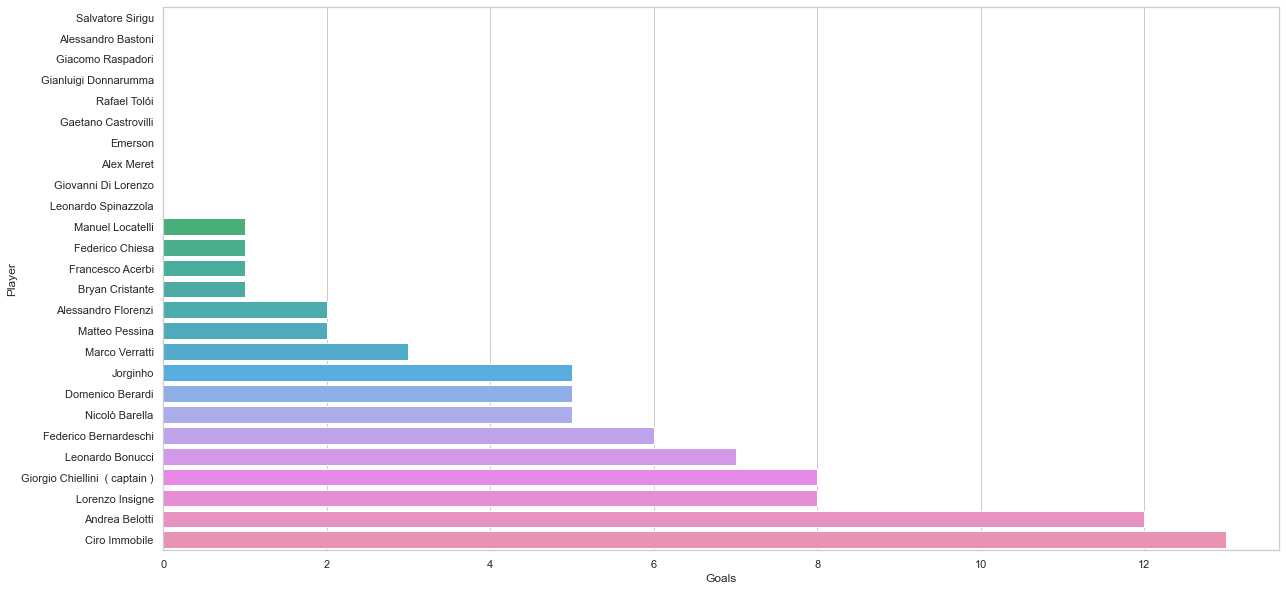

In [150]:
plt.figure(figsize=(20, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Goals", y="Player", data=italy_goals)

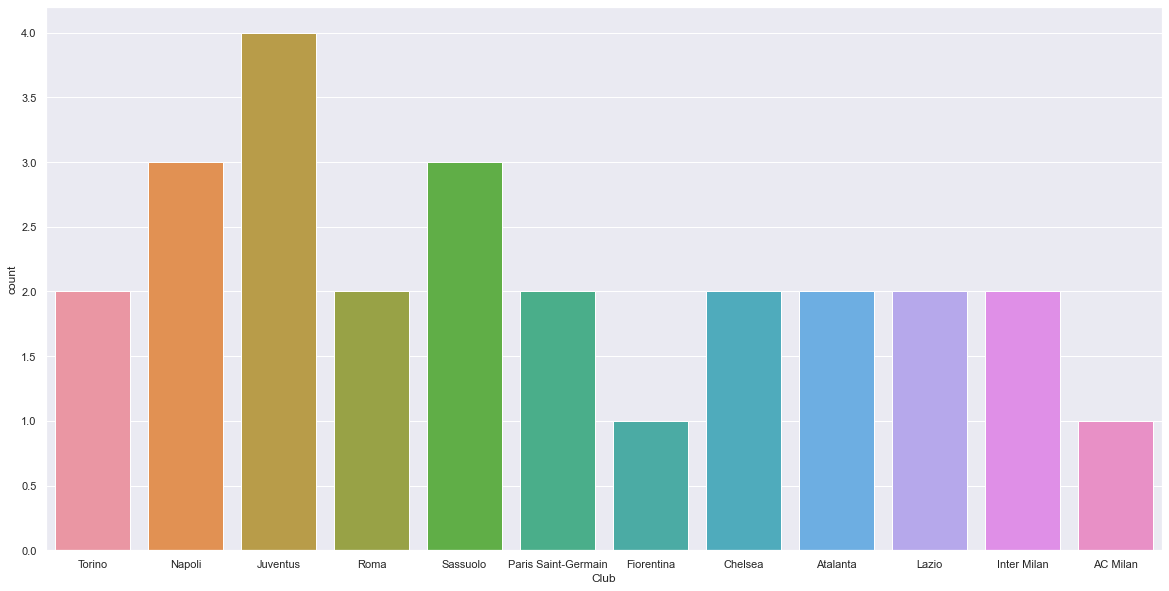

In [156]:
plt.figure(figsize=(20, 10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Club", data=italy)